In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import datetime
import time
%matplotlib inline

In [2]:
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def sigmoid(x):
    sess = tf.InteractiveSession()
    x = tf.constant(x, dtype=tf.float32)
    sess.run(tf.initialize_all_variables())
    result = tf.nn.sigmoid(x).eval()
    sess.close()
    return result

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)



def single_hidden_nn_train(x_train, y_train, x_test=None, y_test=None,
                           x_valid=None, y_valid=None,
                           hidden_size=2, steps=5):
    """
    :param hidden_size: int type, size of the (only) single layer
    :param steps: iteration steps
    :rtype : tuple of strings -- method and result
    """
    num_features = x_train.shape[1]
    num_class = y_train.shape[1]
    sess = tf.InteractiveSession()
    x = tf.placeholder(tf.float32, shape=[None, num_features])
    y = tf.placeholder(tf.float32, shape=[None, num_class])

    W = weight_variable([num_features, hidden_size])
    b = bias_variable([hidden_size])
    W2 = weight_variable([hidden_size, num_class])
    b2 = bias_variable([num_class])

    #hidden = tf.nn.relu(tf.matmul(x, W) + b)
    hidden = tf.nn.sigmoid(tf.matmul(x, W) + b)
    y_lin = tf.matmul(hidden, W2) + b2
    loss = -tf.reduce_mean(y_lin*y - tf.log(1+tf.exp(y_lin)), 0)  
    train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)
    
    
    
    
    #correct_prediction = tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1))
    #accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))  # Do we need to do this every step??
    sess.run(tf.initialize_all_variables())
    for i in range(steps):
#         if i % 100 == 0:
#             train_accuracy = accuracy.eval(feed_dict={x: x_train, y: y_train})
#             print("step %d, training accuracy %g" % (i, train_accuracy))
        train_step.run(feed_dict={x: x_train, y: y_train})
    
    print W2.eval()
    W = W.eval()
    b = b.eval()
    sess.close()
    return W, b

In [3]:
x_train = np.array(sorted(np.random.rand(400)*6)).reshape(-1, 1)
y_train = np.array([1]*100+[0]*200 + [1]*100)

In [4]:
w, b  = single_hidden_nn_train(x_train, y_train.reshape(-1,1), steps=20000)

[[-12.64018822]
 [ 13.92048454]]


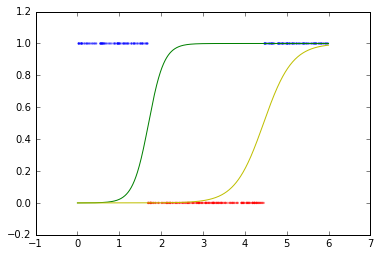

In [5]:
plt.scatter(x_train, y_train, alpha=0.3, s=2,
            color = map(lambda x: 'r' if x==0 else 'b', y_train))
pts = np.linspace(0,6,800)
curve1 = sigmoid(b[0] + w[0][0]*pts)
curve2 = sigmoid(b[1] + w[0][1]*pts)
plt.plot(pts, curve1,'g')
plt.plot(pts, curve2,'y')